In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('titanic.csv')

In [ ]:
print("1.What is the overall survival rate of passengers aboard the Titanic?")
overall_survival_rate = df['Survived'].mean() * 100
print(f"Overall survival rate: {overall_survival_rate:.2f}%")

1.What is the overall survival rate of passengers aboard the Titanic?
Overall survival rate: 38.38%


In [ ]:
print("\n2.How does the survival rate vary by passenger class (Pclass)?")
survival_by_pclass = df.groupby('Pclass')['Survived'].mean().reset_index()
survival_by_pclass['Survived'] = survival_by_pclass['Survived'] * 100
print(survival_by_pclass)


2.How does the survival rate vary by passenger class (Pclass)?
   Pclass   Survived
0       1  62.962963
1       2  47.282609
2       3  24.236253


In [ ]:
print("\n3.What is the average age of passengers who survived vs. those who did not survive?")
average_age_by_survival = df.groupby('Survived')['Age'].mean().reset_index()
print(average_age_by_survival)


3.What is the average age of passengers who survived vs. those who did not survive?
   Survived        Age
0         0  30.626179
1         1  28.343690


In [ ]:
print("\n4. How many passengers embarked from each port (Embarked), and what are their survival rates?")
embarked_data = df.groupby('Embarked').agg(passenger_count=('PassengerId', 'count'),survival_rate=('Survived', 'mean'))
embarked_data['survival_rate'] = embarked_data['survival_rate'] * 100
print(embarked_data)


4. How many passengers embarked from each port (Embarked), and what are their survival rates?
          passenger_count  survival_rate
Embarked                                
C                     168      55.357143
Q                      77      38.961039
S                     644      33.695652



5.What is the distribution of fare prices paid by passengers, and does fare impact survival chances?
Survival Rate by Fare Bin:
                 Fare  Survived
0   (-0.512, 102.466]  0.361575
1  (102.466, 204.932]  0.757576
2  (204.932, 307.398]  0.647059
3  (307.398, 409.863]       NaN
4  (409.863, 512.329]  1.000000


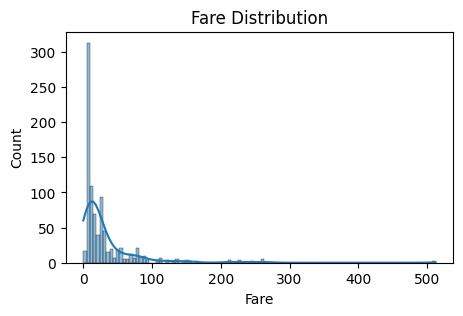

In [31]:
print("\n5.What is the distribution of fare prices paid by passengers, and does fare impact survival chances?")
fare_bins = pd.cut(df['Fare'], bins=5)
survival_by_fare_bin = df.groupby(fare_bins, observed=False)['Survived'].mean().reset_index()
print("Survival Rate by Fare Bin:")
print(survival_by_fare_bin)
plt.figure(figsize=(5, 3))
sns.histplot(df['Fare'], kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()


6.Plot the count of passengers by passenger class (Pclass).


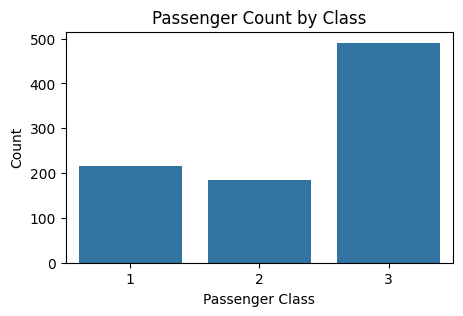

In [ ]:
print("\n6.Plot the count of passengers by passenger class (Pclass).")
plt.figure(figsize=(5, 3))
sns.countplot(x='Pclass', data=df)
plt.title('Passenger Count by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()


7.Visualize the survival rate with respect to gender using a bar chart.


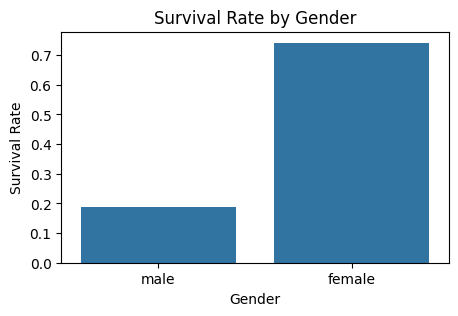

In [ ]:
print("\n7.Visualize the survival rate with respect to gender using a bar chart.")
plt.figure(figsize=(5, 3))
sns.barplot(x='Sex', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()


8.Show the age distribution of passengers using a histogram or KDE plot.


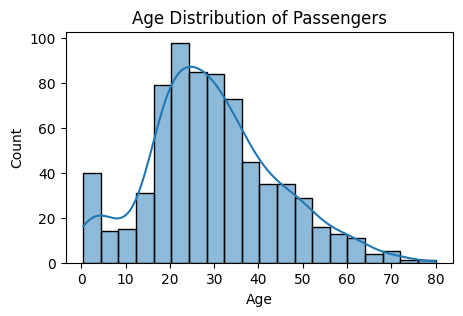

In [ ]:
print("\n8.Show the age distribution of passengers using a histogram or KDE plot.")
plt.figure(figsize=(5, 3))
sns.histplot(df['Age'].dropna(), kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


9.Create a boxplot comparing fares across different passenger classes.


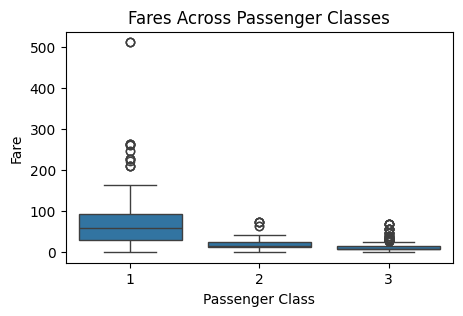

In [ ]:
print("\n9.Create a boxplot comparing fares across different passenger classes.")
plt.figure(figsize=(5, 3))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fares Across Passenger Classes')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()


10.Visualize survival count by embarkation port (Embarked) with a stacked bar chart.


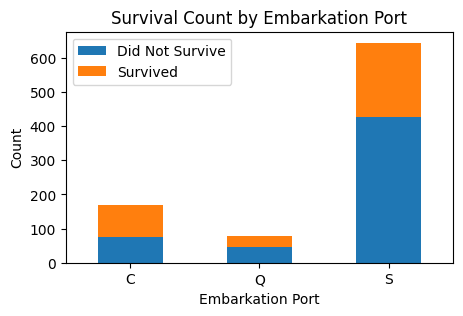

In [ ]:
print("\n10.Visualize survival count by embarkation port (Embarked) with a stacked bar chart.")
embarked_survival_counts = pd.crosstab(df['Embarked'], df['Survived'])
embarked_survival_counts.columns = ['Did Not Survive', 'Survived']
embarked_survival_counts.plot(kind='bar', stacked=True, figsize=(5, 3))
plt.title('Survival Count by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


11.Display a heatmap of the correlation matrix of numerical features in the dataset


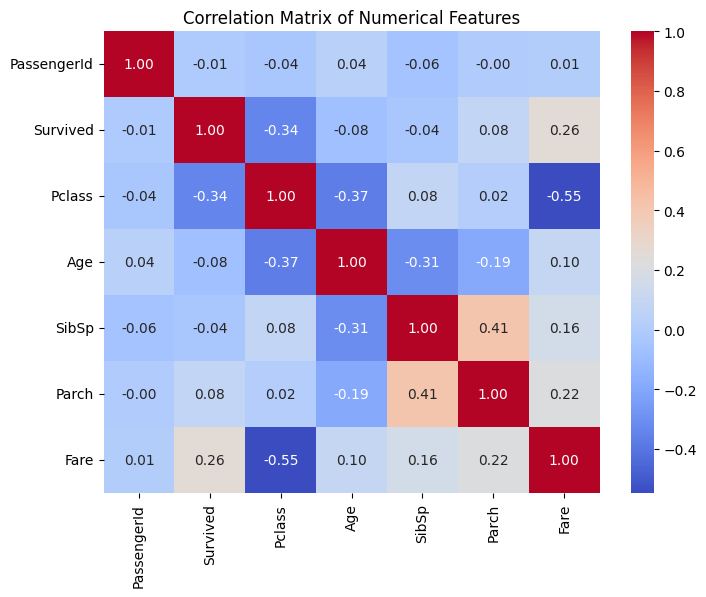

In [ ]:
print("\n11.Display a heatmap of the correlation matrix of numerical features in the dataset")
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()